In [1]:
#plot parameters of domains

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120

In [80]:
import seaborn as sns


In [82]:
# to print the version of current used modules
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.9.0
pandas==0.25.0
numpy==1.18.5
matplotlib==3.0.2


In [12]:
a = pd.read_csv('domains_parameters_08172020.csv')
a.head()

,Unnamed: 0,Area,Major axis,Minor axis
0,wo_TTX,3015.25,108.118,95.780
1,wo_TTX,2554.75,83.810,70.840
2,wo_TTX,1272.50,71.632,65.126
3,wo_TTX,1963.00,85.739,73.505
4,wo_TTX,2861.50,128.307,91.484


In [13]:
a.rename(columns = {'Unnamed: 0':'if_ttx'},inplace=True) #when to use inplace = True ???
a.head()

,if_ttx,Area,Major axis,Minor axis
0,wo_TTX,3015.25,108.118,95.780
1,wo_TTX,2554.75,83.810,70.840
2,wo_TTX,1272.50,71.632,65.126
3,wo_TTX,1963.00,85.739,73.505
4,wo_TTX,2861.50,128.307,91.484


In [22]:
a['id']=a.index
a.head()

,if_ttx,Area,Major axis,Minor axis,id
0,wo_TTX,3015.25,108.118,95.780,0
1,wo_TTX,2554.75,83.810,70.840,1
2,wo_TTX,1272.50,71.632,65.126,2
3,wo_TTX,1963.00,85.739,73.505,3
4,wo_TTX,2861.50,128.307,91.484,4


In [27]:
# a1=pd.melt(a,id_vars=['id'],var_name='metrics', value_name='values')
# a1

In [32]:
a_wo=a.loc[a['if_ttx']=='wo_TTX']
print('without TTX, the domain parameter:\n')
print('Mean of area is:',a_wo.loc[:,'Area'].mean())
print('Std of area is:',a_wo.loc[:,'Area'].std())
a_wo.describe()

without TTX, the domain parameter:

Mean of area is: 3186.3189655172414
Std of area is: 3395.997042801532


,Area,Major axis,Minor axis,id
count,29.000000,29.000000,29.000000,29.000000
mean,3186.318966,136.568621,93.303276,14.000000
std,3395.997043,59.163465,46.898838,8.514693
min,104.250000,48.959000,31.051000,0.000000
25%,1185.000000,85.739000,65.126000,7.000000
50%,2076.750000,128.307000,82.121000,14.000000
75%,3330.500000,176.573000,110.425000,21.000000
max,15128.000000,255.863000,228.996000,28.000000


In [33]:
a.tail()

,if_ttx,Area,Major axis,Minor axis,id
29,TTX,3015.25,108.118,95.780,29
30,TTX,2554.75,83.810,70.840,30
31,TTX,1272.50,71.632,65.126,31
32,TTX,1963.00,85.739,73.505,32
33,TTX,2861.50,128.307,91.484,33


In [34]:
a_ttx=a.loc[a['if_ttx']=='TTX']
print('without TTX, the domain parameter:\n')
print('Mean of area is:',a_ttx.loc[:,'Area'].mean())
print('Std of area is:',a_ttx.loc[:,'Area'].std())
a_ttx.describe()

without TTX, the domain parameter:

Mean of area is: 2333.4
Std of area is: 716.8524647722152


,Area,Major axis,Minor axis,id
count,5.000000,5.000000,5.000000,5.000000
mean,2333.400000,95.521200,79.347000,31.000000
std,716.852465,22.567264,13.472983,1.581139
min,1272.500000,71.632000,65.126000,29.000000
25%,1963.000000,83.810000,70.840000,30.000000
50%,2554.750000,85.739000,73.505000,31.000000
75%,2861.500000,108.118000,91.484000,32.000000
max,3015.250000,128.307000,95.780000,33.000000


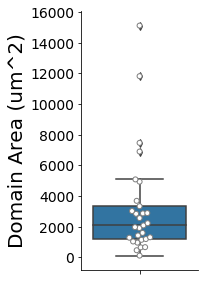

In [72]:
#plot the figures in the wide format dataset

fig, ax = plt.subplots(figsize=(3,4))
sns.boxplot(x = None, y = 'Area',data = a_wo)
sns.swarmplot(x = None, y = 'Area',data = a_wo,color="white", edgecolor="grey", linewidth=1)
# ax.set(title = '', xlabel = "", ylabel='Area (um^2)')
sns.despine() #magic to remove the x-top , and y-right axis
#g.set(xticks=(np.arange(1,80,30))) #xlim=(0,80),ylim=(0,30000),
plt.ylabel('Domain Area (um^2)',size=20)#,fontname="Arial"
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=14)
# You can specify a rotation for the tick labels in degrees or with keywords.
# plt.xticks(rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
#plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
#plt.subplots_adjust(bottom=0.15)

plt.tight_layout()
plt.savefig("wottx_domain_area.png",dpi=300,)

In [52]:
a_wo.loc[:,['Major axis','Minor axis']].head()

,Major axis,Minor axis
0,108.118,95.780
1,83.810,70.840
2,71.632,65.126
3,85.739,73.505
4,128.307,91.484


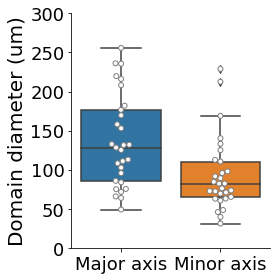

In [76]:
fig, ax = plt.subplots(figsize=(4,4))
sns.boxplot(data = a_wo.loc[:,['Major axis','Minor axis']])
sns.swarmplot(data = a_wo.loc[:,['Major axis','Minor axis']],color="white", edgecolor="grey", linewidth=1)
# ax.set(title = '', xlabel = "", ylabel='Area (um^2)')
sns.despine() #magic to remove the x-top , and y-right axis
#g.set(xticks=(np.arange(1,80,30))) #xlim=(0,80),ylim=(0,30000),
plt.ylabel('Domain diameter (um)',size=20)#,fontname="Arial"
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
plt.ylim(0,300)
# You can specify a rotation for the tick labels in degrees or with keywords.
# plt.xticks(rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
#plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
#plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.savefig("wottx_domain_diameter.png",dpi=300,)

In [74]:
a_ttx=a.loc[a['if_ttx']=='TTX']
print('without TTX, the domain parameter:\n')
print('Mean of area is:',a_ttx.loc[:,'Area'].mean())
print('Std of area is:',a_ttx.loc[:,'Area'].std())
a_ttx.describe()

without TTX, the domain parameter:

Mean of area is: 2333.4
Std of area is: 716.8524647722152


,Area,Major axis,Minor axis,id
count,5.000000,5.000000,5.000000,5.000000
mean,2333.400000,95.521200,79.347000,31.000000
std,716.852465,22.567264,13.472983,1.581139
min,1272.500000,71.632000,65.126000,29.000000
25%,1963.000000,83.810000,70.840000,30.000000
50%,2554.750000,85.739000,73.505000,31.000000
75%,2861.500000,108.118000,91.484000,32.000000
max,3015.250000,128.307000,95.780000,33.000000


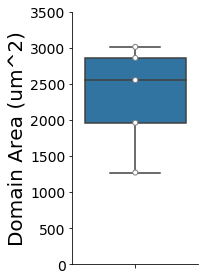

In [77]:
fig, ax = plt.subplots(figsize=(3,4))
sns.boxplot(x = None, y = 'Area',data = a_ttx)
sns.swarmplot(x = None, y = 'Area',data = a_ttx,color="white", edgecolor="grey", linewidth=1)
# ax.set(title = '', xlabel = "", ylabel='Area (um^2)')
sns.despine() #magic to remove the x-top , and y-right axis
#g.set(xticks=(np.arange(1,80,30))) #xlim=(0,80),ylim=(0,30000),
plt.ylabel('Domain Area (um^2)',size=20)#,fontname="Arial"
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=14)
# You can specify a rotation for the tick labels in degrees or with keywords.
# plt.xticks(rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
#plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
#plt.subplots_adjust(bottom=0.15)
plt.ylim(0,3500)
plt.tight_layout()
plt.savefig("ttx_domain_area.png",dpi=300,)

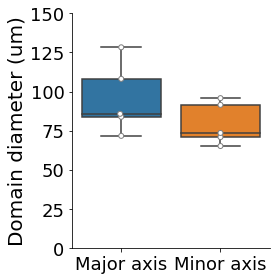

In [79]:
fig, ax = plt.subplots(figsize=(4,4))
sns.boxplot(data = a_ttx.loc[:,['Major axis','Minor axis']])
sns.swarmplot(data = a_ttx.loc[:,['Major axis','Minor axis']],color="white", edgecolor="grey", linewidth=1)
# ax.set(title = '', xlabel = "", ylabel='Area (um^2)')
sns.despine() #magic to remove the x-top , and y-right axis
#g.set(xticks=(np.arange(1,80,30))) #xlim=(0,80),ylim=(0,30000),
plt.ylabel('Domain diameter (um)',size=20)#,fontname="Arial"
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
plt.ylim(0,150)
# You can specify a rotation for the tick labels in degrees or with keywords.
# plt.xticks(rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
#plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
#plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.savefig("ttx_domain_diameter.png",dpi=300,)